# PCA 분석

## 주성분 분석 개요

### 차원축소 (Dimensionlity Reduction)
데이터의 전반적인 특성을 보존하면서 데이터의 변수 수를 줄이는 방법

> 크기가 10행 7열인 dataframe의 차원은 (10x7) <br>
> 변수 3개를 제거하면 10행 4열로 바뀜 (10x4)

|방법|종류
|--|--|
|특성 선택|가장 중요한 특성들만 선택하여 기존의 데이터를 표현|
|특성 추출|기존 특성들을 사용하여 새로운 특성들을 만들어내는 방법|

### 주성분 분석(PCA)

데이터의 가장 큰 분산을 가진 방향으로 차원을 축소하여 데이터를 표현하는 방법

이를 통해 데이터를 가장 잘 설명하는 주요 특성들을 찾을 수 있다. 

데이터의 복장성을 줄여 다양한 분야에서 활용되며 머신러닝, 패턴 인식, 시각화, 데이터 압축 등 다양한 분야에서 중요한 기술로 사용.


In [41]:
# 주성분 분석용 패키지
from sklearn.decomposition import PCA
# 주성분 분석 결과를 DataFrame으로 확인할 수 있는 기능을 제공하는 패키지
from pca import pca 
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler

from pandas import read_excel, DataFrame

from matplotlib import pyplot as plt
import seaborn as sb

import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

In [42]:
df=read_excel("https://data.hossam.kr/E04/boston.xlsx")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [43]:
df=read_excel("https://data.hossam.kr/E04/boston.xlsx")
df.drop("CAT. MEDV",axis=1,inplace=True)  
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 데이터 전처리

#### 독립변수 컬럼만 추출

In [44]:
x_train = df.drop("MEDV",axis=1)# y축에 해당하는 값을 삭제
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


### 추출된 독립변수를 표준화 

(D.탐색적 데이터 분석 -> 01_데이터정규화)

In [45]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_train_std

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

### 표준화 결과를 데이터 프레임으로 재구성

In [46]:
std_df = DataFrame(x_train_std, columns = x_train.columns)
std_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Sklearn을 사용한 PCA 분석

In [47]:
# 주성분 분석 객체 생성(n_components : 주성분 개수 = 내가 뽑고싶은 columns 수 )
model = PCA(n_components=5)
fit = model.fit_transform(std_df)
fit

array([[-2.09829747,  0.77311275,  0.34294273, -0.89177403,  0.42307036],
       [-1.45725167,  0.59198521, -0.69519931, -0.48745853, -0.19587567],
       [-2.07459756,  0.5996394 ,  0.1671216 , -0.73920419, -0.93453406],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, -0.78630409, -1.59518454],
       [-0.27051907,  1.04136158, -0.58545406, -0.67813391, -1.41602419],
       [-0.12580322,  0.76197805, -1.294882  , -0.2883292 , -0.89096917]])

### 결과 확인
sklearn 의 PCA 분석은 기존의 변수들을 토대로 n_component 수 만큼의 새로운 변수를 생성한다.

대부분 머신러닝의 학습 데이터를 생성하는 용도로 사용한다.

In [48]:
pca_df = DataFrame(fit)
pca_df

,0,1,2,3,4
0,-2.098297,0.773113,0.342943,-0.891774,0.423070
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924
...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024


## PCA 패키지를 사용한 분석 (추천)

In [49]:
# 주성분 분석의 대상 컬럼 수를 독립변수의 전체 컬럼의 길이로 설정
model = pca(n_components=len(std_df.columns))
# 표준화 결과를 활용하여 주성분 분석 수행
fit = model.fit_transform(std_df)
fit

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[13]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':           CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
 PC1   0.250951 -0.256315  0.346672  0.005042  0.342852 -0.189243  0.313671   
 PC2  -0.315252 -0.323313  0.112493  0.454829  0.219116  0.149332  0.311978   
 PC3   0.246566  0.295858 -0.015946  0.289781  0.120964  0.593961 -0.017675   
 PC4   0.061771  0.128712  0.017146  0.815941 -0.128226 -0.280592 -0.175206   
 PC5   0.082157  0.320617 -0.007811  0.086531  0.136854 -0.423447  0.016691   
 PC6  -0.219660 -0.323388 -0.076138  0.167490 -0.152983  0.059267 -0.071709   
 PC7   0.777607 -0.274996 -0.339576  0.074136 -0.199635  0.063940  0.116011   
 PC8   0.153350 -0.402680  0.173932 -0.024662  0.080121 -0.326752 -0.600823   
 PC9   0.260390  0.358137  0.644416 -0.013728 -0.018522  0.047898 -0.067562   
 PC10  0.019369  0.267527 -0.363532 -0.006182  0.231056 -0.431420  0.362779   
 PC11 -0.109644  0.262756 -0.303169  0.013927  0.111319  0.053162 -0.459159   
 PC12  0.086761 -0.071425 -0.113200 -0.0

생성된 주성분에 사용된 필드 확인

In [50]:
topfit = fit['topfeat']
topfit

,PC,feature,loading,type
0,PC1,INDUS,0.346672,best
1,PC2,CHAS,0.454829,best
2,PC3,RM,0.593961,best
3,PC4,CHAS,0.815941,best
4,PC5,PTRATIO,-0.584002,best
5,PC6,B,-0.803455,best
6,PC7,CRIM,0.777607,best
7,PC8,AGE,-0.600823,best
8,PC9,INDUS,0.644416,best
9,PC10,LSTAT,-0.600711,best


### 주성분 분석 결과를 토대로 회귀분석 수행

원본 데이터프레임으로 분석

In [51]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [52]:
best = topfit.query('type=="best"')
topfit = fit['topfeat']
topfit


,PC,feature,loading,type
0,PC1,INDUS,0.346672,best
1,PC2,CHAS,0.454829,best
2,PC3,RM,0.593961,best
3,PC4,CHAS,0.815941,best
4,PC5,PTRATIO,-0.584002,best
5,PC6,B,-0.803455,best
6,PC7,CRIM,0.777607,best
7,PC8,AGE,-0.600823,best
8,PC9,INDUS,0.644416,best
9,PC10,LSTAT,-0.600711,best


In [54]:
best = topfit.query("type=='best'")
feature = list(set(best['feature']))
feature

['RM',
 'NOX',
 'INDUS',
 'TAX',
 'DIS',
 'CRIM',
 'PTRATIO',
 'CHAS',
 'LSTAT',
 'B',
 'AGE']

In [55]:
ols = my_ols(df, "MEDV",feature)
ols.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     118.4
Date:                Wed, 26 Jul 2023   Prob (F-statistic):          9.42e-131
Time:                        13:39:53   Log-Likelihood:                -1513.7
No. Observations:                 506   AIC:                             3051.
Df Residuals:                     494   BIC:                             3102.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5585      5.020      6.087      0.000      20.695      40.422
RM             4.2847      0.420     10.206      0.000       3.460       5.110
NOX          -15.8300      3.880     -4.079      0.000     -23.454      -8.206
INDUS         -0.0722      0.061     -1.194      0.233      -0.191       0.047
TAX            0.0029      0.002      1.240      0.216      -0.002       0.007
DIS           -1.2542      0.187     -6.698      0.000      -1.622      -0.886
CRIM          -0.0619      0.032     -1.905      0.057      -0.126       0.002
PTRATIO       -0.9655      0.124     -7.774      0.000      -1.210      -0.721
CHAS           3.1229      0.880      3.548      0.000       1.393       4.852
LSTAT         -0.5091      0.052     -9.786      0.000      -0.611      -0.407
B              0.0086      0.003      3.112      0.002       0.003       0.014
AGE           -0.0083      0.013     -0.616      0.538      -0.035       0.018
==============================================================================
Omnibus:                      192.416   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.673
Skew:                           1.617   Prob(JB):                    7.36e-206
Kurtosis:                       8.861   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
ols.table

B   표준오차  β        t   유의확률         VIF
종속변수 독립변수                                                   
MEDV RM         4.2847  0.420  0  10.206*  0.000  136.101743
     NOX      -15.8300  3.880  0  -4.079*  0.000   74.004269
     INDUS     -0.0722  0.061  0  -1.194*  0.233   14.485874
     TAX        0.0029  0.002  0   1.240*  0.216   61.939713
     DIS       -1.2542  0.187  0  -6.698*  0.000   15.430455
     CRIM      -0.0619  0.032  0  -1.905*  0.057    2.131404
     PTRATIO   -0.9655  0.124  0  -7.774*  0.000   87.227233
     CHAS       3.1229  0.880  0   3.548*  0.000    1.176266
     LSTAT     -0.5091  0.052  0  -9.786*  0.000   12.615188
     B          0.0086  0.003  0   3.112*  0.002   21.351015
     AGE       -0.0083  0.013  0  -0.616*  0.538   21.398863

### 결과 분석하기

In [57]:
실제집값 = df['MEDV']
실제집값

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [58]:
예측집값 = ols.fit.predict(df.filter(feature))
예측집값

0      31.319245
1      25.506274
2      31.493779
3      29.616826
4      28.986126
         ...    
501    24.133272
502    22.626843
503    28.076938
504    26.573324
505    22.545271
Length: 506, dtype: float64

In [59]:
result_df = DataFrame({
    "실제집값":실제집값,
    "예측집값":예측집값
})
result_df

,실제집값,예측집값
0,24.0,31.319245
1,21.6,25.506274
2,34.7,31.493779
3,33.4,29.616826
4,36.2,28.986126
...,...,...
501,22.4,24.133272
502,20.6,22.626843
503,23.9,28.076938
504,22.0,26.573324


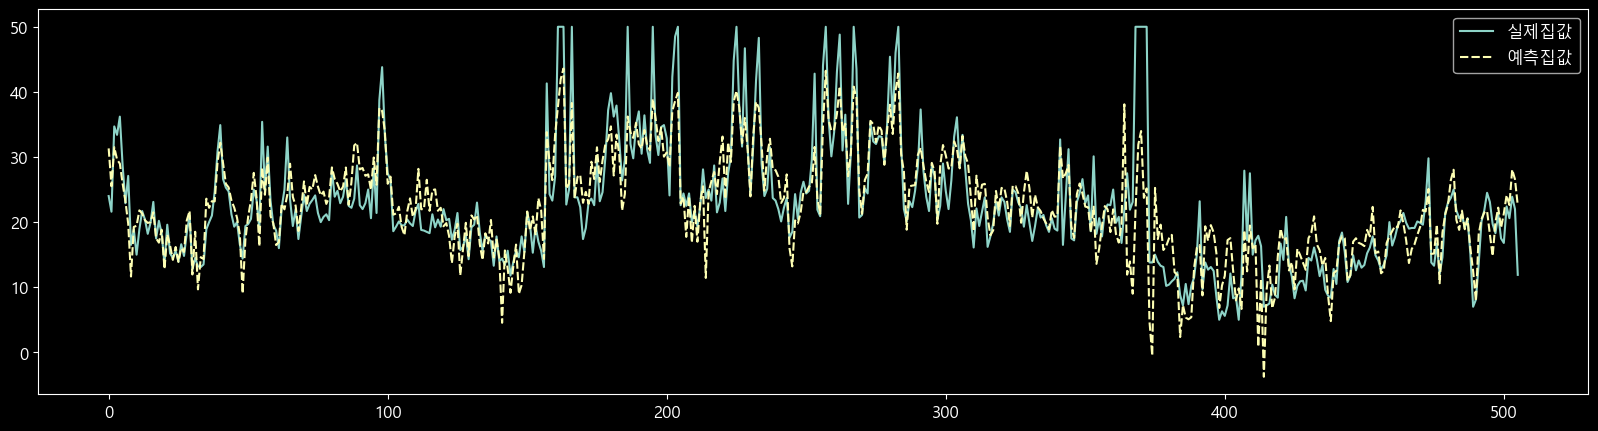

In [61]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['axes.unicode_minus'] = False

sb.lineplot(data=result_df.filter(['실제집값','예측집값']))
plt.show()
plt.close()